In [1]:


suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(argparse))

figure_theme_path <- file.path(
    "..","visulaization_utils", "figure_themes.R")
source(figure_theme_path)

Warning message:
“package ‘dplyr’ was built under R version 4.2.3”
Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘argparse’ was built under R version 4.2.3”


In [ ]:
# define command line arguments
parser <- ArgumentParser(description = "Visualize MLP results")
# add arguments
parser$add_argument('--celltype', type='character', help='Cell type to visualize')
parser$add_argument('--model_name', type='character', help='Model name to visualize')

# parse arguments from command line
args <- parser$parse_args()

# define cell type
celltype <- args$celltype
model_name <- args$model_name


In [4]:
output_file <- file.path(
    "..","..","figures","Binary_Classification",model_name,celltype,"pr_curves.png"
)

In [5]:
results_dir <- file.path(
    "..","..","results","Binary_Classification","DMSO_0.025_vs_LPS_100","SHSY5Y"
)
results_file <- file.path(
    results_dir,"training_metrics.csv"
)

# Read in the results file
df <- read.csv(results_file)
head(df,3)

,treatments_tested,model,group,shuffled_data,PR_Threshold,Precision,Recall
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,DMSO_0.100_%_DMSO_0.025_% vs. LPS_100.000_ug_per_ml_DMSO_0.025_%,DMSO_0.025_vs_LPS_100,train,False,6.556796e-20,0.2780008,1
2,DMSO_0.100_%_DMSO_0.025_% vs. LPS_100.000_ug_per_ml_DMSO_0.025_%,DMSO_0.025_vs_LPS_100,train,False,4.140657e-19,0.2780089,1
3,DMSO_0.100_%_DMSO_0.025_% vs. LPS_100.000_ug_per_ml_DMSO_0.025_%,DMSO_0.025_vs_LPS_100,train,False,1.024154e-18,0.2780171,1


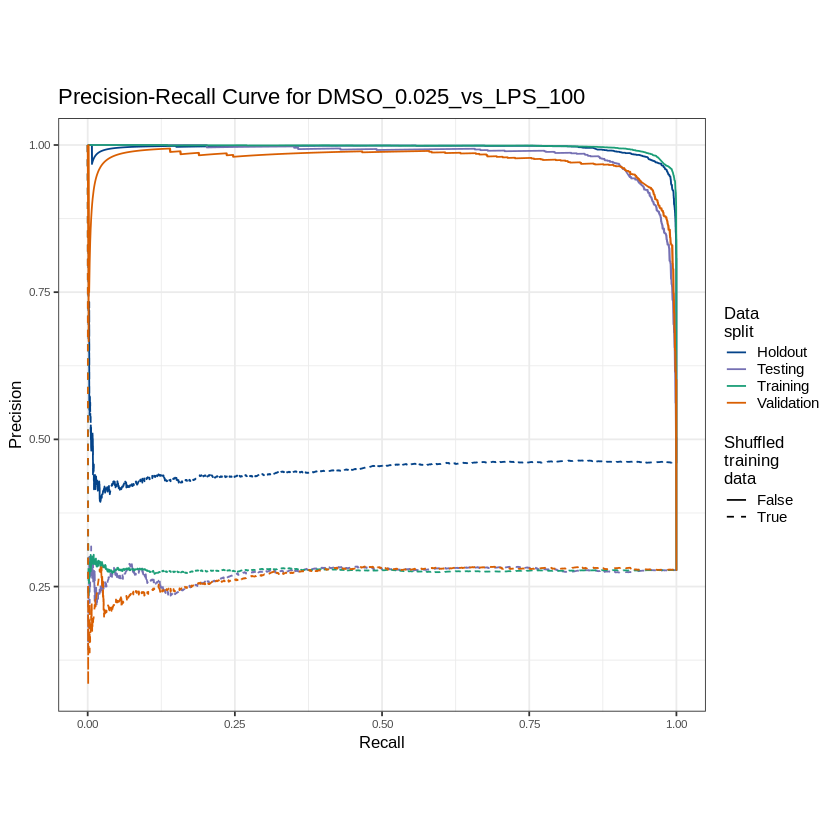

In [7]:
pr_curve_gg <- (
    ggplot(df, aes(x = Recall, y = Precision))
    + geom_line(aes(color = group, linetype = shuffled_data))
    + theme_bw()
    + xlab("Recall")
    + ylab("Precision")
    # set the colors of the lines
    + scale_color_manual(
        name = "Data\nsplit",
        labels = data_split_labels,
        values = data_split_colors
    )

    + scale_linetype_manual(
        name = "Shuffled\ntraining\ndata",
        labels = shuffled_labels,
        values = shuffled_linetypes
    )

    + guides(
        color = guide_legend(order = 1),
        linetype = guide_legend(order = 2),
    )
    + coord_fixed()
    + figure_theme
    # Decrease spacing in legend
    + theme(
        legend.spacing.y = unit(0.1, "cm"),
        legend.box.spacing = unit(0.2, "cm"),
        legend.key.size = unit(0.7, "lines"),
        legend.key.width = unit(1, "lines")
    )
    + ggtitle(paste0("Precision-Recall Curve for ", model_name))
)
ggsave(output_file, pr_curve_gg, height = 5.5, width = 8.5, dpi = 500)
pr_curve_gg